In [3]:
import requests
from datetime import date
from datetime import datetime
from datetime import timedelta
import json

class SingaporeHazeRecord:
    def __init__(self, timestamp, westPsi, eastPsi, centralPsi, southPsi, northPsi, westPM25, eastPM25, centralPM25, southPM25, northPM25):
        self.timestamp = timestamp
        self.westPsi = westPsi
        self.eastPsi = eastPsi
        self.centralPsi = centralPsi
        self.southPsi = southPsi
        self.northPsi = northPsi
        self.westPM25 = westPM25
        self.eastPM25 = eastPM25
        self.centralPM25 = centralPM25
        self.southPM25 = southPM25
        self.northPM25 = northPM25

    def __str__(self):
        return "{},{},{},{},{},{},{},{},{},{},{}"\
            .format(self.timestamp, self.westPsi,self.eastPsi,self.centralPsi,self.southPsi,self.northPsi,
                    self.westPM25,self.eastPM25,self.centralPM25,self.southPM25,self.northPM25)


def getDate(date):
    return "{}".format(date.strftime("%Y-%m-%d"))

def getAqi(date):

    url = "https://www.haze.gov.sg/resources/historical-readings/GetData/{}/{}/{}/1571758500".format(date.day,date.month,date.year)
    page = requests.get(url)
    return page.text

def parseHazeJson(jsonStr, date):
    reading = json.loads(jsonStr)
    items = reading['AirQualityList']
    records = []
    for item in items:
        records.append(SingaporeHazeRecord(
            "{} {}".format(date.strftime("%Y-%m-%d"), item['Time']['Text']),
            item['MaxReading']['West'],
            item['MaxReading']['East'],
            item['MaxReading']['Central'],
            item['MaxReading']['South'],
            item['MaxReading']['North'],
            item['PM25Reading']['West'],
            item['PM25Reading']['East'],
            item['PM25Reading']['Central'],
            item['PM25Reading']['South'],
            item['PM25Reading']['North']
        ))
    return records

def write(fileName, records):
    f = open(fileName, "a")
    for record in records:
        f.write(record.__str__() + "\n")
    f.close()

def main():
    #strDate = input("Please input date[default 2009-01-01]:") or "2009-01-01"
    strDate = "2019-01-01"
    date = datetime.strptime(strDate, '%Y-%m-%d')
    today = datetime.now()
    print("Scrapping data from {} until {}".format(date, today))
    fileName = "C:/Users/User/Desktop/UM/WQD7005/Milestone/SingaporeHazePSI_{}-{}.csv".format(strDate, today.strftime("%Y-%m-%d"))
    f = open(fileName, "a")
    f.write("timestamp, westPsi, eastPsi, centralPsi, southPsi, northPsi, westPM25, eastPM25, centralPM25, southPM25, northPM25\n")
    f.close()
    while date.__le__(today):
        print("Processing {}".format(date))
        records = parseHazeJson(getAqi(date),date)
        write(fileName, records)
        date = date + timedelta(days=1)

    print("done")

def test():
    jsonStr = '{"IsPM25DisplayAvail":false,"AirQualityList":[{"Id":"65e5eef2-7fa8-4349-ac5e-2eeb432baa8a","Date":"\/Date(1445446800000)\/","Time":{"Value":"1","Text":"1:00am"},"MaxReading":{"North":"115","South":"116","East":"109","West":"125","Central":"106","OverallReading":"106-125"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"412e8672-0769-4726-ab33-cb6075963f78","Date":"\/Date(1445450400000)\/","Time":{"Value":"2","Text":"2:00am"},"MaxReading":{"North":"113","South":"112","East":"106","West":"122","Central":"103","OverallReading":"103-122"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"2857602a-bedf-4c4d-81ab-0f17b51690f1","Date":"\/Date(1445454000000)\/","Time":{"Value":"3","Text":"3:00am"},"MaxReading":{"North":"109","South":"109","East":"104","West":"118","Central":"99","OverallReading":"99-118"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"7f00fa64-6400-4c2a-a574-cf3a794dc13a","Date":"\/Date(1445457600000)\/","Time":{"Value":"4","Text":"4:00am"},"MaxReading":{"North":"106","South":"106","East":"100","West":"115","Central":"97","OverallReading":"97-115"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"79355d16-ef0a-4380-a453-97bc03d268a4","Date":"\/Date(1445461200000)\/","Time":{"Value":"5","Text":"5:00am"},"MaxReading":{"North":"103","South":"104","East":"97","West":"113","Central":"94","OverallReading":"94-113"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"612df441-762d-4929-8731-d7351befadad","Date":"\/Date(1445464800000)\/","Time":{"Value":"6","Text":"6:00am"},"MaxReading":{"North":"100","South":"101","East":"94","West":"110","Central":"92","OverallReading":"92-110"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"8acadaa0-722b-41c3-abe1-99ac9e264c85","Date":"\/Date(1445468400000)\/","Time":{"Value":"7","Text":"7:00am"},"MaxReading":{"North":"97","South":"98","East":"92","West":"108","Central":"90","OverallReading":"90-108"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"dff8bbde-88fb-4c45-8dde-fb646338f530","Date":"\/Date(1445472000000)\/","Time":{"Value":"8","Text":"8:00am"},"MaxReading":{"North":"94","South":"96","East":"90","West":"106","Central":"88","OverallReading":"88-106"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"b85f4061-f0a2-47de-8b71-f4673bb14bce","Date":"\/Date(1445475600000)\/","Time":{"Value":"9","Text":"9:00am"},"MaxReading":{"North":"93","South":"95","East":"89","West":"104","Central":"87","OverallReading":"87-104"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"b2ec9613-6b43-4ba9-b10d-87c77feb30b0","Date":"\/Date(1445479200000)\/","Time":{"Value":"10","Text":"10:00am"},"MaxReading":{"North":"91","South":"93","East":"89","West":"103","Central":"86","OverallReading":"86-103"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"db9ab5ba-f25a-434a-8810-511a8a284344","Date":"\/Date(1445482800000)\/","Time":{"Value":"11","Text":"11:00am"},"MaxReading":{"North":"92","South":"94","East":"91","West":"103","Central":"87","OverallReading":"87-103"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"1f70b170-e2ed-4a3d-bdde-0d60b91ef24a","Date":"\/Date(1445486400000)\/","Time":{"Value":"12","Text":"12:00pm"},"MaxReading":{"North":"91","South":"93","East":"91","West":"102","Central":"87","OverallReading":"87-102"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"ab09fe8a-1377-4d54-8be0-5fd2720c3423","Date":"\/Date(1445490000000)\/","Time":{"Value":"13","Text":"1:00pm"},"MaxReading":{"North":"90","South":"93","East":"91","West":"102","Central":"86","OverallReading":"86-102"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"51bfd098-f0c4-41da-b541-c6e5f6e9b523","Date":"\/Date(1445493600000)\/","Time":{"Value":"14","Text":"2:00pm"},"MaxReading":{"North":"90","South":"90","East":"90","West":"101","Central":"84","OverallReading":"84-101"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"d133411f-7463-491c-a5d8-de6dc4193b85","Date":"\/Date(1445497200000)\/","Time":{"Value":"15","Text":"3:00pm"},"MaxReading":{"North":"89","South":"87","East":"88","West":"98","Central":"82","OverallReading":"82-98"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"46e5e79a-ab5c-47b1-8850-9e9fd419bc86","Date":"\/Date(1445500800000)\/","Time":{"Value":"16","Text":"4:00pm"},"MaxReading":{"North":"88","South":"85","East":"86","West":"96","Central":"80","OverallReading":"80-96"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"96a0715b-e81d-4b3b-a23d-b54ef73f67b9","Date":"\/Date(1445504400000)\/","Time":{"Value":"17","Text":"5:00pm"},"MaxReading":{"North":"85","South":"83","East":"84","West":"93","Central":"78","OverallReading":"78-93"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"88dff3fa-c1b0-4fb1-8fba-5298a7f4cca8","Date":"\/Date(1445508000000)\/","Time":{"Value":"18","Text":"6:00pm"},"MaxReading":{"North":"83","South":"81","East":"83","West":"90","Central":"76","OverallReading":"76-90"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"5152463b-5dc7-4fc8-b78e-b2e7d162e1dc","Date":"\/Date(1445511600000)\/","Time":{"Value":"19","Text":"7:00pm"},"MaxReading":{"North":"82","South":"80","East":"83","West":"87","Central":"75","OverallReading":"75-87"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"4f067cea-e249-43f9-a749-fa7e4db074b6","Date":"\/Date(1445515200000)\/","Time":{"Value":"20","Text":"8:00pm"},"MaxReading":{"North":"82","South":"79","East":"82","West":"85","Central":"74","OverallReading":"74-85"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"b6da666f-aff0-4af7-a5b8-f7473db02e56","Date":"\/Date(1445518800000)\/","Time":{"Value":"21","Text":"9:00pm"},"MaxReading":{"North":"81","South":"79","East":"80","West":"84","Central":"73","OverallReading":"73-84"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"6c2ce707-6454-4c3b-bd96-d8c62f26ea7c","Date":"\/Date(1445522400000)\/","Time":{"Value":"22","Text":"10:00pm"},"MaxReading":{"North":"80","South":"77","East":"79","West":"82","Central":"72","OverallReading":"72-82"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"c853cdeb-32b7-4eea-b991-e1c9402e1ee3","Date":"\/Date(1445526000000)\/","Time":{"Value":"23","Text":"11:00pm"},"MaxReading":{"North":"78","South":"76","East":"78","West":"80","Central":"71","OverallReading":"71-80"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}},{"Id":"bee15740-8db9-45e0-8609-94ba8ff931c6","Date":"\/Date(1445529600000)\/","Time":{"Value":"0","Text":"12:00am"},"MaxReading":{"North":"77","South":"76","East":"78","West":"79","Central":"70","OverallReading":"70-79"},"PM25Reading":{"North":null,"South":null,"East":null,"West":null,"Central":null,"OverallReading":"0-0"}}]}'
    records = parseHazeJson(jsonStr, datetime.now())

    print("timestamp, westPsi, eastPsi, centralPsi, southPsi, northPsi, westPM25, eastPM25, centralPM25, southPM25, northPM25\n")
    for record in records:
        print(record)

main()

Scrapping data from 2019-12-01 00:00:00 until 2019-12-21 16:00:43.336172
Processing 2019-12-01 00:00:00
Processing 2019-12-02 00:00:00
Processing 2019-12-03 00:00:00
Processing 2019-12-04 00:00:00
Processing 2019-12-05 00:00:00
Processing 2019-12-06 00:00:00
Processing 2019-12-07 00:00:00
Processing 2019-12-08 00:00:00
Processing 2019-12-09 00:00:00
Processing 2019-12-10 00:00:00
Processing 2019-12-11 00:00:00
Processing 2019-12-12 00:00:00
Processing 2019-12-13 00:00:00
Processing 2019-12-14 00:00:00
Processing 2019-12-15 00:00:00
Processing 2019-12-16 00:00:00
Processing 2019-12-17 00:00:00
Processing 2019-12-18 00:00:00
Processing 2019-12-19 00:00:00
Processing 2019-12-20 00:00:00
Processing 2019-12-21 00:00:00
done


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Set the limit of display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

PSI=pd.read_csv(r"C:\Users\User\Desktop\UM\WQD7005\Milestone\psi_data5.csv", header=0,skipinitialspace=True)
#print(PSI).head()
print(PSI.columns.tolist())

['Date', 'PSI Avg', 'Total International Visitor Arrivals', 'YOY GDP Growth Rate', 'Average of A68U', 'Average of C6L', 'Average of H15', 'Average of M04', 'Average of G13', 'Trend']


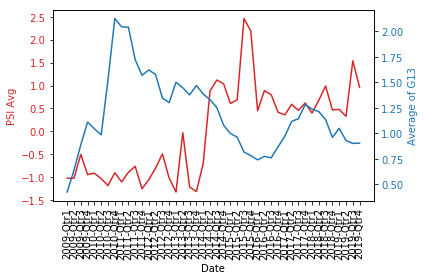

In [13]:
##Plot PSI vs G13 share price
Date_plot=np.array(PSI['Date'])
PSI_plot=np.array(PSI['PSI Avg'])
G13_plot=np.array(PSI['Average of G13'])

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('PSI Avg', color=color)
ax1.plot(Date_plot, PSI_plot, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average of G13', color=color)  # we already handled the x-label with ax1
ax2.plot(Date_plot, G13_plot, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.show()

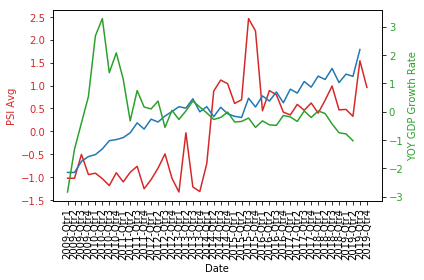

In [14]:
##Plot Visitor#, GDP vs G13 share price
Date_plot=np.array(PSI['Date'])
Tourist_plot=np.array(PSI['Total International Visitor Arrivals'])
GDP_plot=np.array(PSI['YOY GDP Growth Rate'])

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('PSI Avg', color=color)
ax1.plot(Date_plot, PSI_plot, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total International Visitor Arrivals', color=color)  # we already handled the x-label with ax1
ax2.plot(Date_plot, Tourist_plot, color=color)
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax2.set_ylabel('YOY GDP Growth Rate', color=color)  # we already handled the x-label with ax1
ax2.plot(Date_plot, GDP_plot, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.show()

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dataset=pd.read_csv(r"C:\Users\User\Desktop\UM\WQD7005\Milestone\psi_data5.csv", header=0,skipinitialspace=True)
Dataset.columns=['Date','PSI Avg','Visitor Arrivals','GDP Growth','A68U','C6L','H15','M04','G13','Trend']
print(Dataset.corr())


                   PSI Avg  Visitor Arrivals  GDP Growth      A68U       C6L       H15       M04       G13     Trend
PSI Avg           1.000000  0.617179         -0.327364    0.394310 -0.486339  0.765864  0.314759 -0.503952 -0.086500
Visitor Arrivals  0.617179  1.000000         -0.238562    0.644469 -0.684337  0.765720  0.598053 -0.112230 -0.194125
GDP Growth       -0.327364 -0.238562          1.000000    0.337235  0.677897 -0.112583  0.091828  0.464736 -0.079359
A68U              0.394310  0.644469          0.337235    1.000000 -0.184453  0.737588  0.539104  0.263823 -0.217090
C6L              -0.486339 -0.684337          0.677897   -0.184453  1.000000 -0.451879 -0.114509  0.396142  0.193808
H15               0.765864  0.765720         -0.112583    0.737588 -0.451879  1.000000  0.558161 -0.210956 -0.040619
M04               0.314759  0.598053          0.091828    0.539104 -0.114509  0.558161  1.000000  0.346116 -0.014276
G13              -0.503952 -0.112230          0.464736    0.2638

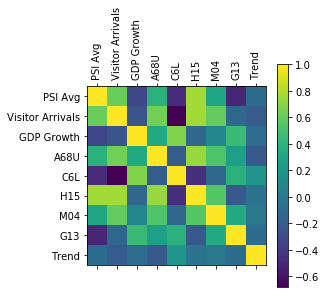

<Figure size 720x720 with 0 Axes>

In [16]:
plt.matshow(Dataset.corr())
plt.xticks(range(9),['PSI Avg','Visitor Arrivals','GDP Growth','A68U','C6L','H15','M04','G13','Trend'],rotation=90)
plt.yticks(range(9),['PSI Avg','Visitor Arrivals','GDP Growth','A68U','C6L','H15','M04','G13','Trend'])
plt.colorbar()
plt.figure(figsize=(10,10))
plt.show()

# Linear Regression

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

dataset=pd.read_csv(r"C:\Users\User\Desktop\UM\WQD7005\Milestone\psi_data5.csv", header=0,skipinitialspace=True)
#dataset.isnull().any()
dataset['Total International Visitor Arrivals'].fillna((dataset['Total International Visitor Arrivals'].mean()), inplace=True)
dataset['YOY GDP Growth Rate'].fillna((dataset['YOY GDP Growth Rate'].mean()), inplace=True)

dataset.columns.tolist()

['Date',
 'PSI Avg',
 'Total International Visitor Arrivals',
 'YOY GDP Growth Rate',
 'Average of A68U',
 'Average of C6L',
 'Average of H15',
 'Average of M04',
 'Average of G13',
 'Trend']

In [19]:
df = pd.DataFrame(dataset, columns=dataset.columns)
target = pd.DataFrame(dataset, columns=['Average of G13'])

#Dep.Variable:Average of G13
X = df[['PSI Avg', 'Total International Visitor Arrivals', 'YOY GDP Growth Rate','Average of A68U','Average of C6L','Average of H15','Average of M04']]
y = target['Average of G13']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Average of G13   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     176.8
Date:                Sat, 21 Dec 2019   Prob (F-statistic):           1.88e-26
Time:                        23:14:34   Log-Likelihood:                 5.7261
No. Observations:                  44   AIC:                             2.548
Df Residuals:                      37   BIC:                             15.04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
PSI Avg                                 -0.1421      0.061     -2.318      0.026      -0.266      -0.018
Total International Visitor Arrivals    -0.0589      0.085     -0.692      0.493      -0.231       0.113
YOY GDP Growth Rate                      0.0359      0.041      0.884      0.382      -0.046       0.118
Average of A68U                          1.1957      0.369      3.241      0.003       0.448       1.943
Average of C6L                          -0.0239      0.031     -0.775      0.443      -0.087       0.039
Average of H15                          -0.2498      0.106     -2.350      0.024      -0.465      -0.034
Average of M04                           0.5879      0.158      3.731      0.001       0.269       0.907
==============================================================================
Omnibus:                        0.902   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.637   Jarque-Bera (JB):                0.243
Skew:                           0.002   Prob(JB):                        0.886
Kurtosis:                       3.364   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, predictions)))

Mean Absolute Error: 0.16336200933909206
Mean Squared Error: 0.04513249785536299
Root Mean Squared Error: 0.2124441052497409


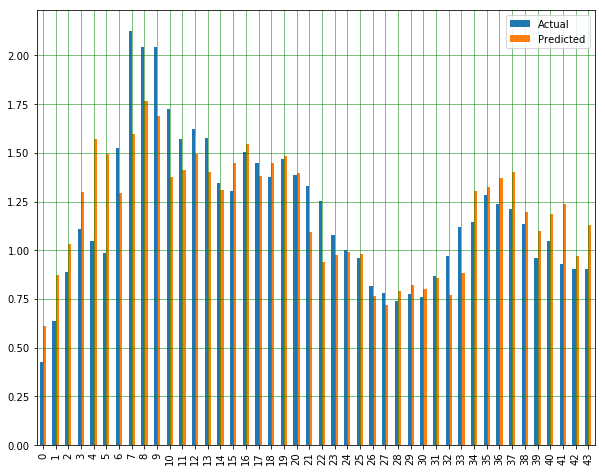

In [24]:
df = pd.DataFrame({'Actual': y, 'Predicted': predictions})
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Logistic Regression

In [25]:
df = pd.DataFrame(dataset, columns=dataset.columns)
target = pd.DataFrame(dataset, columns=["Trend"])

X = df[['PSI Avg', 'Total International Visitor Arrivals', 'YOY GDP Growth Rate','Average of A68U','Average of C6L','Average of H15','Average of M04']]
y = target["Trend"]


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.5,random_state=1)

In [32]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
print(logmodel.fit(X_train,y_train))
y_pred=logmodel.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

              precision    recall  f1-score   support

           0       0.40      1.00      0.57         8
           1       1.00      0.14      0.25        14

   micro avg       0.45      0.45      0.45        22
   macro avg       0.70      0.57      0.41        22
weighted avg       0.78      0.45      0.37        22



array([[ 8,  0],
       [12,  2]], dtype=int64)